# Time Series, Custom Class

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [2]:
import pandas as pd
import numpy as np
import ontime as on

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/statsforecast/core.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


---
## Generation of random time series

In [3]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

In [4]:
ts[0:5]

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[ 0.2723568 ]],

       [[-1.5569272 ]],

       [[ 0.00838568]],

       [[-2.1595223 ]],

       [[-2.14411014]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-01-05
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

---
## Use `TimeSeries` object

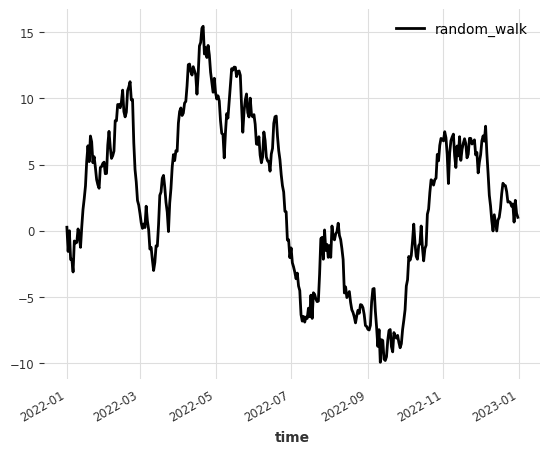

In [5]:
ts.plot();

---
## Custom Class Creation

### Create custom model

In [6]:
from ontime.abstract import AbstractBaseModel

class MyModel(AbstractBaseModel):

    def __init__(self):
        super().__init__()

    def fit(self, series):
        super().fit(series)
        print('I am fitted')

    def predict(self, n):
        super().predict(n)
        print('I predicted')
    

Load custom model in OnTime

In [7]:
on.models.get_all()

['arima', 'catboost', 'TCN']

In [8]:
on.models.load('my_model', MyModel) 
on.models.get_all()

['arima', 'catboost', 'TCN', 'my_model']

In [9]:
m = on.models.my_model()

In [10]:
m.fit(ts)

I am fitted


In [11]:
m.predict(5)

I predicted


### Create custom detector

In [12]:
from ontime.abstract import AbstractBaseDetector

class MyDetector(AbstractBaseDetector):

    def __init__(self):
        super().__init__()

    def detect(self, ts):
        print('I detected')
        

Load custom detector in OnTime

In [13]:
on.detectors.get_all()

['threshold', 'quantile']

In [14]:
on.detectors.load('my_detector', MyDetector)

In [15]:
on.detectors.get_all()

['threshold', 'quantile', 'my_detector']

In [16]:
on.detectors.my_detector().detect(ts)

I detected
